### Importing all the required libraries

In [1]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

### Reading the CSV file into variable df and viewing the top 5 Rows

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Checking if we have any Null Values in the data set

In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

### Checking how the data is distributed with 5 Number summary and some stats

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Checking the DataTypes of the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking the shape(Number of Rows and Columns) of the dataset

In [6]:
df.shape

(32561, 15)

### Mapping Salary column to zero and one with less than 50k and greater than 50k respectively

In [7]:
salary_map={' <=50K':0,' >50K':1} 
df['salary']=df['salary'].map(salary_map).astype(int)

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### stripping all the spaces from the strings in the data

In [9]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
#applying whitespace_remover function on dataframe
whitespace_remover(df)

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


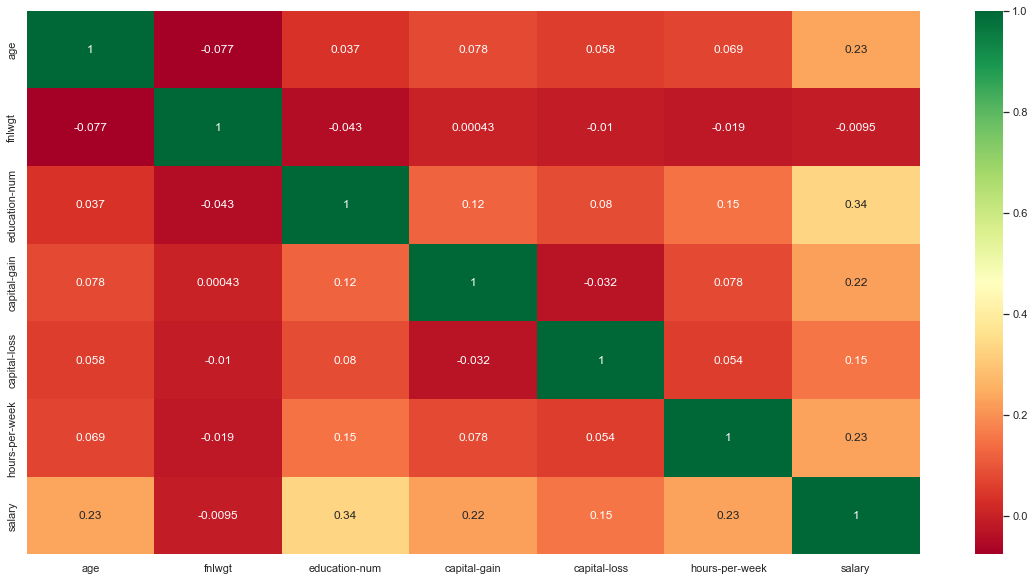

In [11]:
corrmat = df.corr()
top_corr_features = corrmat.index
# plt.figure(figsize=(18,8))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap = 'RdYlGn')

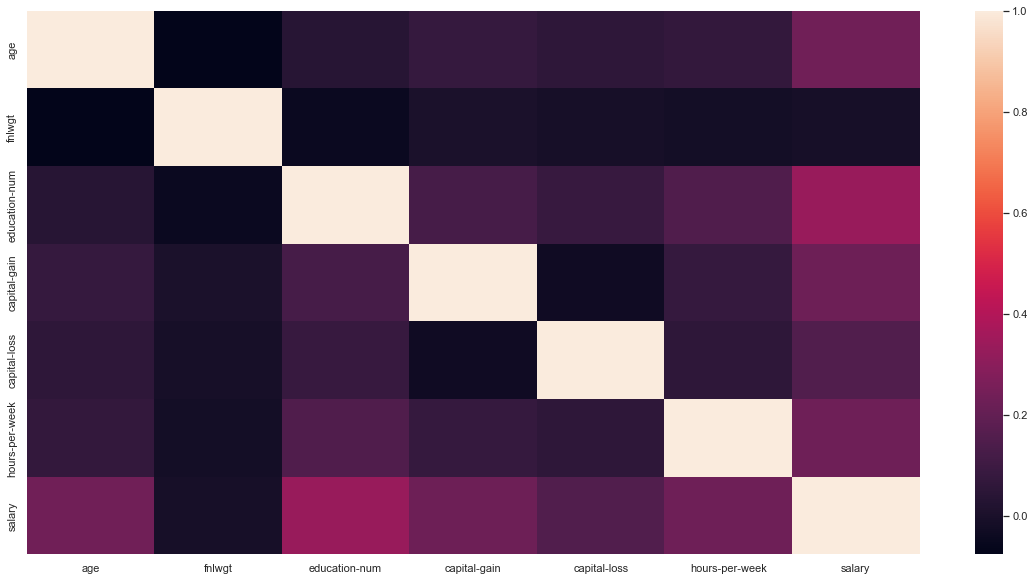

In [12]:
#always remember your magic function if using Jupyter
correlations = df.corr()
sns.heatmap(correlations)
# figure = plt.figure(figsize=e=(12, 6))
# sns.set(rc={'figure.figsize':(20,10)})
plt.show()

## The below chart shows the division of the salary based on gender where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'Type of medals won over the years')

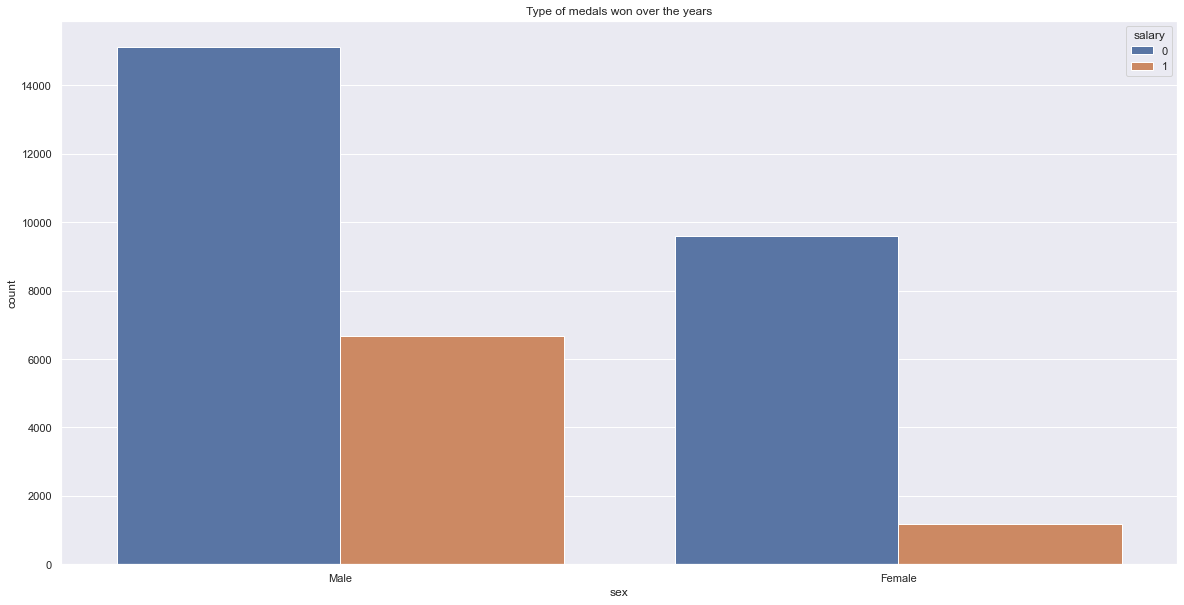

In [13]:
sns.countplot(x='sex',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.title("Type of medals won over the years")

## The below chart shows the division of the salary based on education where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'Type of medals won over the years')

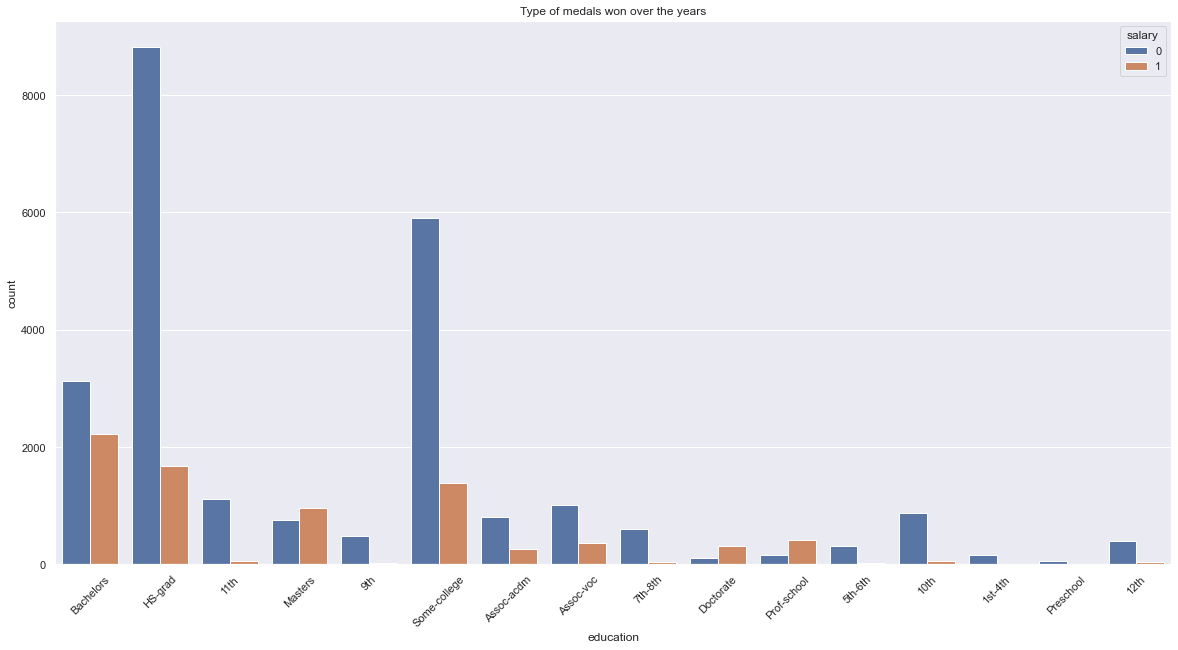

In [14]:
sns.countplot(x='education',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=45)
plt.title("Type of medals won over the years")

## The below chart shows the division of the salary based on workclass where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'Type of medals won over the years')

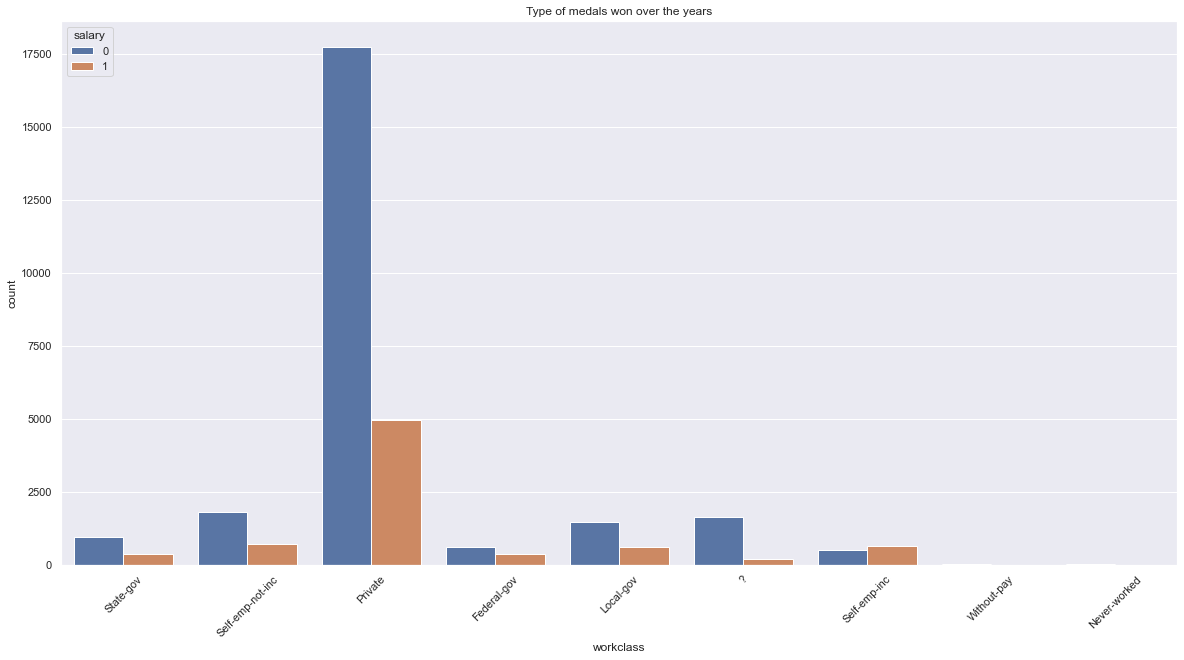

In [15]:
sns.countplot(x='workclass',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=45)
plt.title("Type of medals won over the years")

Text(0.5, 1.0, 'Type of medals won over the years')

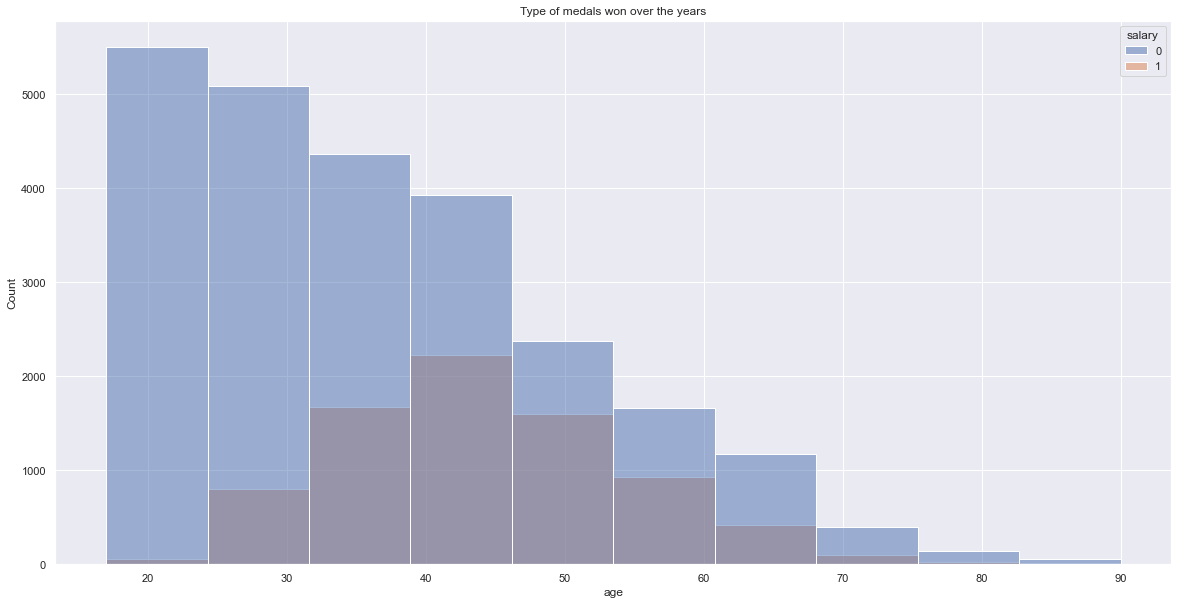

In [16]:
# sns.countplot(x='age',hue='salary',data=df)
sns.histplot(x='age',hue='salary', bins=10,data=df)
# sns.set(rc={'figure.figsize':(20,10)})
# plt.xticks(rotation=45)
plt.title("Type of medals won over the years")

Text(0.5, 1.0, 'Type of medals won over the years')

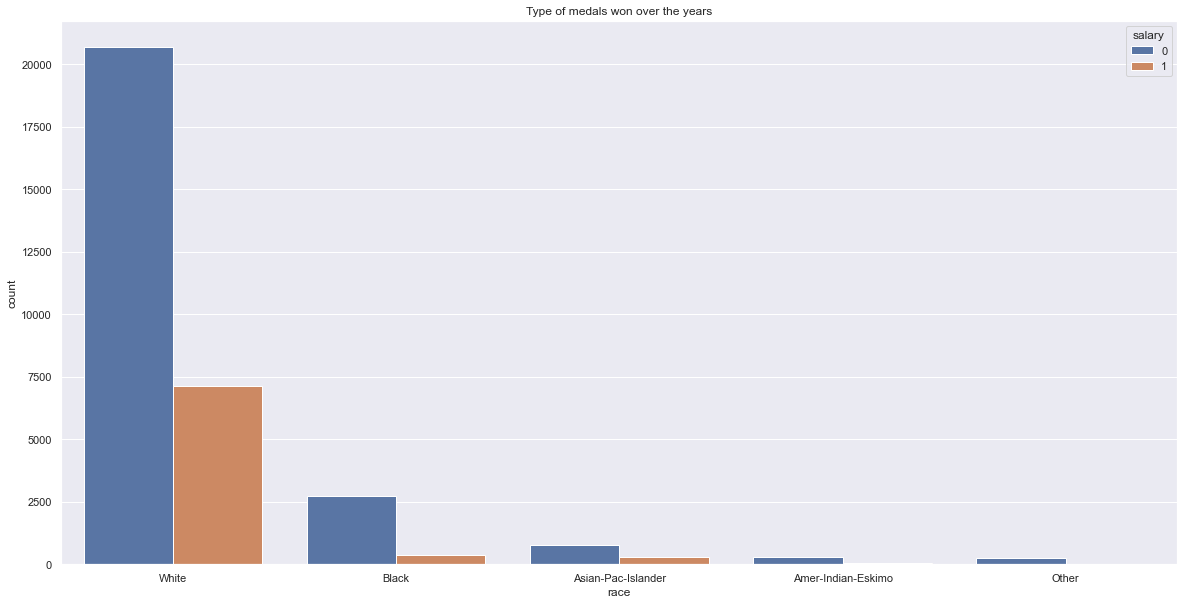

In [17]:
sns.countplot(x='race',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.title("Type of medals won over the years")

## The below chart shows the division of the salary based on country where 0 is people with less than 50k and 1 is people with greater than 50k salary 

Text(0.5, 1.0, 'Type of medals won over the years')

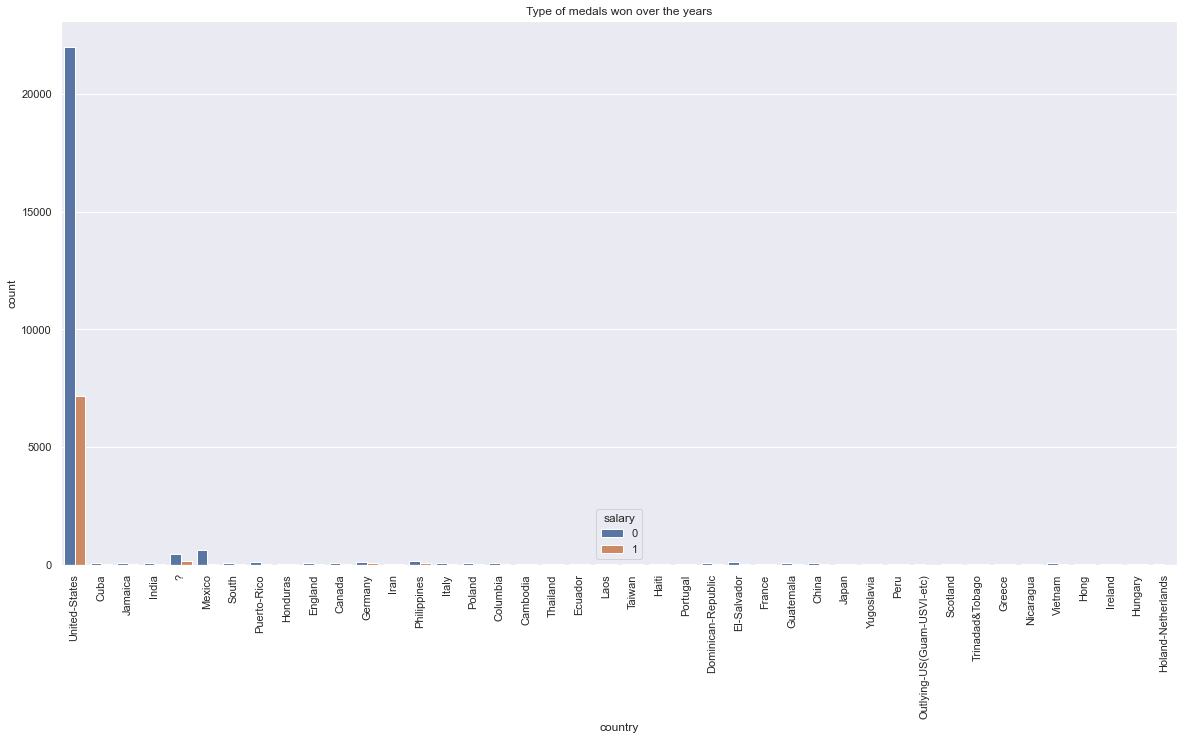

In [18]:
sns.countplot(x='country',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title("Type of medals won over the years")

### The above chart shows most of the people are from US. So dividing the dataset into US and others which will contain all the other countries, might help 

Text(0.5, 1.0, 'Type of medals won over the years')

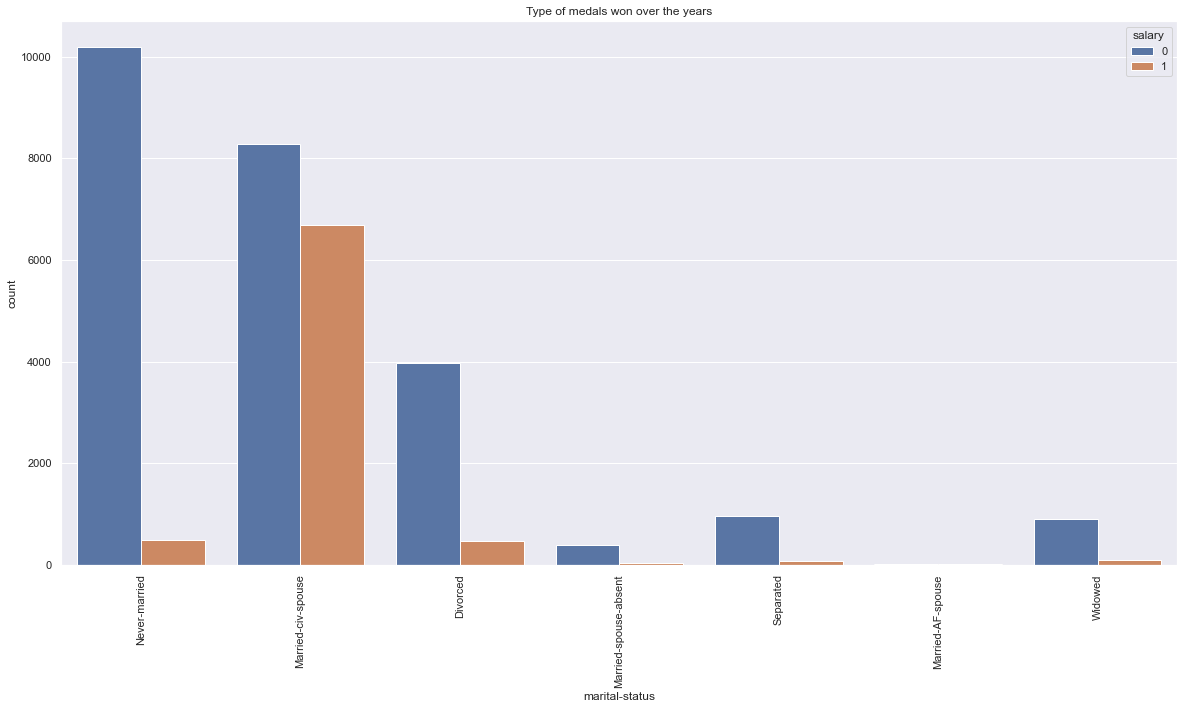

In [19]:
sns.countplot(x='marital-status',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title("Type of medals won over the years")

Text(0.5, 1.0, 'Type of medals won over the years')

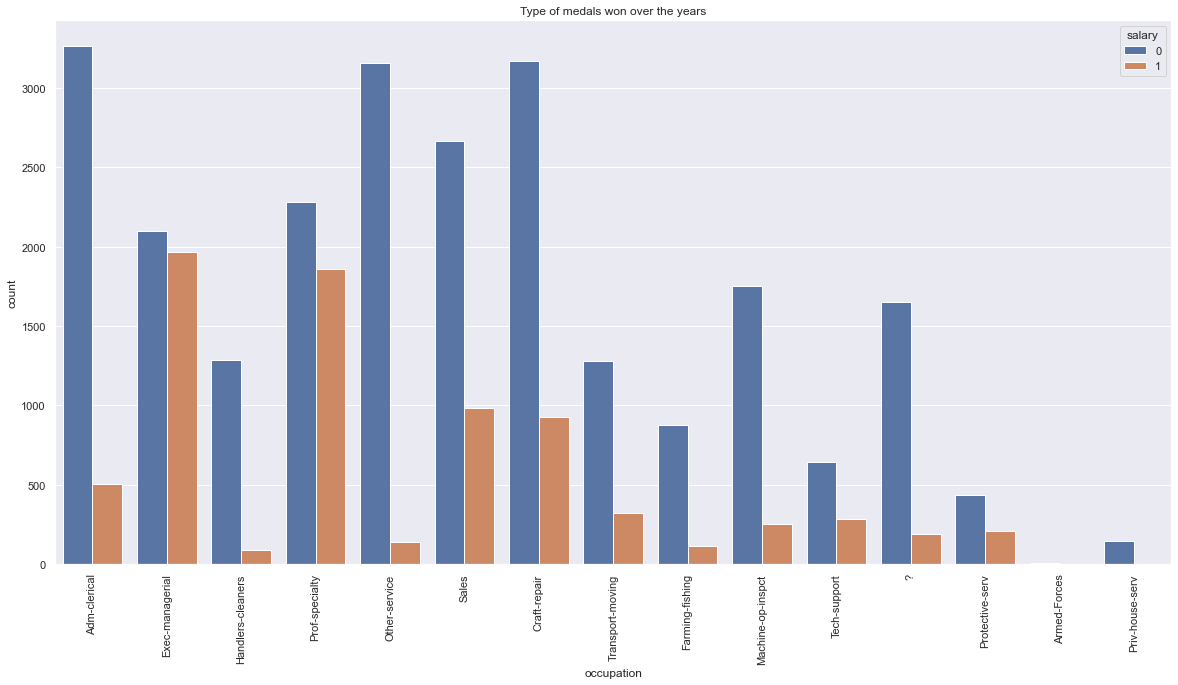

In [20]:
sns.countplot(x='occupation',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title("Type of medals won over the years")

### We see there are some '?' values in Workclass, occupation and country. So replacing them with nan values and maybe dropping them would help.

In [21]:
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

df.dropna(how='any',inplace=True)

In [22]:
df.shape

(30162, 15)

### We see the row count dropped from 32561 to 30162

In [23]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [24]:
df.loc[df['country'] != ' United-States', 'country'] = 'Non-US'
df.loc[df['country'] == ' United-States', 'country'] = 'US'

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,Non-US,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,Non-US,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Non-US,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,Non-US,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Non-US,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,Non-US,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Non-US,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Non-US,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,Non-US,0


Text(0.5, 1.0, 'Type of medals won over the years')

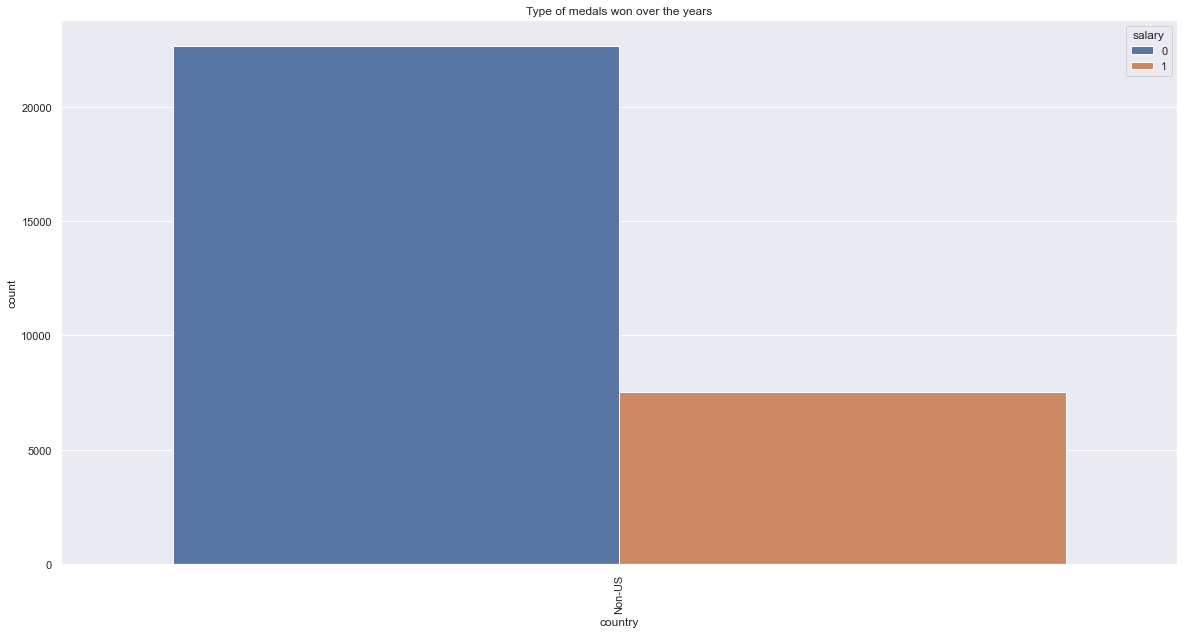

In [25]:
sns.countplot(x='country',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title("Type of medals won over the years")

## Mapping values 1 and 0 with US and Non-US countries

In [26]:
df['country'] = df['country'].map({'US':1,'Non-US':0}).astype(int)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0


Text(0.5, 1.0, 'Type of medals won over the years')

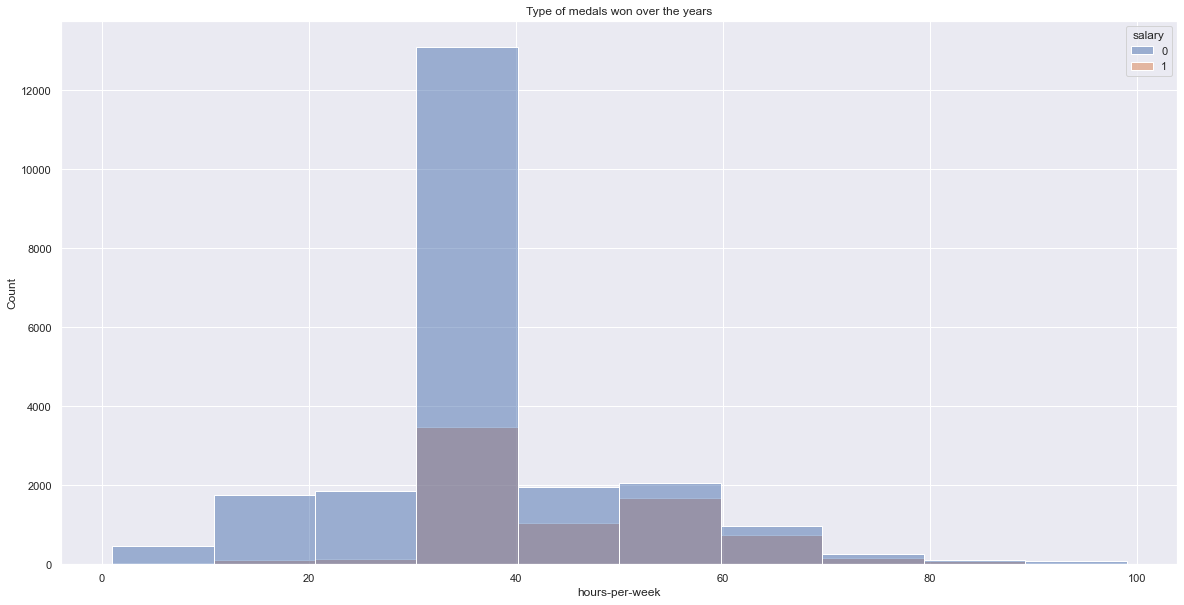

In [27]:
# sns.countplot(x='age',hue='salary',data=df)
sns.histplot(x='hours-per-week',hue='salary', bins=10,data=df)

# plt.xticks(rotation=45)
plt.title("Type of medals won over the years")

In [28]:
df['marital-status'] = df['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,Male,0,0,13,0,0
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,0
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,Male,0,0,40,0,0
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,Female,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Couple,Tech-support,Wife,White,Female,0,0,38,0,0
32557,40,Private,154374,HS-grad,9,Couple,Machine-op-inspct,Husband,White,Male,0,0,40,0,1
32558,58,Private,151910,HS-grad,9,Single,Adm-clerical,Unmarried,White,Female,0,0,40,0,0
32559,22,Private,201490,HS-grad,9,Single,Adm-clerical,Own-child,White,Male,0,0,20,0,0


In [29]:
df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})
   
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,Male,0,0,13,0,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,Male,0,0,40,0,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,Female,0,0,40,0,0
5,37,Private,284582,Masters,14,0,Exec-managerial,Wife,White,Female,0,0,40,0,0
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,Black,Female,0,0,16,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,Husband,White,Male,0,0,45,0,1
8,31,Private,45781,Masters,14,1,Prof-specialty,Not-in-family,White,Female,14084,0,50,0,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,Husband,White,Male,5178,0,40,0,1


In [30]:
relationship_map = {'Unmarried':0,'Wife':1,'Husband':2,'Not-in-family':3,'Own-child':4,'Other-relative':5}

df['relationship'] = df['relationship'].map(relationship_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,Male,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,Male,0,0,13,0,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,Male,0,0,40,0,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,Male,0,0,40,0,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,Female,0,0,40,0,0
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,Female,0,0,40,0,0
6,49,Private,160187,9th,5,1,Other-service,3,Black,Female,0,0,16,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,Male,0,0,45,0,1
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,Female,14084,0,50,0,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,Male,5178,0,40,0,1


In [31]:
race_map={'White':0,'Amer-Indian-Eskimo':1,'Asian-Pac-Islander':2,'Black':3,'Other':4}


df['race']= df['race'].map(race_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,Male,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,Male,0,0,13,0,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,Male,0,0,40,0,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,Male,0,0,40,0,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,Female,0,0,40,0,0
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,Female,0,0,40,0,0
6,49,Private,160187,9th,5,1,Other-service,3,3,Female,0,0,16,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,Male,0,0,45,0,1
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,Female,14084,0,50,0,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,Male,5178,0,40,0,1


In [32]:
df['sex'] = df['sex'].map({'Male':1,'Female':0}).astype(int)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,0,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,0,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,0,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,0,Tech-support,1,0,0,0,0,38,0,0
32557,40,Private,154374,HS-grad,9,0,Machine-op-inspct,2,0,1,0,0,40,0,1
32558,58,Private,151910,HS-grad,9,1,Adm-clerical,0,0,0,0,0,40,0,0
32559,22,Private,201490,HS-grad,9,1,Adm-clerical,4,0,1,0,0,20,0,0


In [33]:
def workcat(x):
    if x['workclass'] == 'Federal-gov' or x['workclass'] == 'Local-gov' or x['workclass']==' State-gov': 
        return 'govt'
    elif x['workclass'] == 'Private':
        return 'private'
    elif x['workclass'] == 'Self-emp-inc' or x['workclass'] == 'Self-emp-not-inc': 
        return 'self_employed'
    else: 
        return 'no_pay'
    
    
df['workclass_type']=df.apply(workcat, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,0,0,no_pay
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,0,0,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,0,0,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,0,0,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0,private
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,0,0,private
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,0,private
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,0,1,self_employed
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,0,1,private
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,0,1,private


In [34]:
workclass_map = {'govt':0,'private':1,'self_employed':2,'no_pay':3}

df['workclass_type'] = df['workclass_type'].map(workclass_map)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,0,0,3
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,0,0,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,0,0,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,0,0,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,0,0,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,0,1,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,0,1,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,0,1,1


Text(0.5, 1.0, 'Type of medals won over the years')

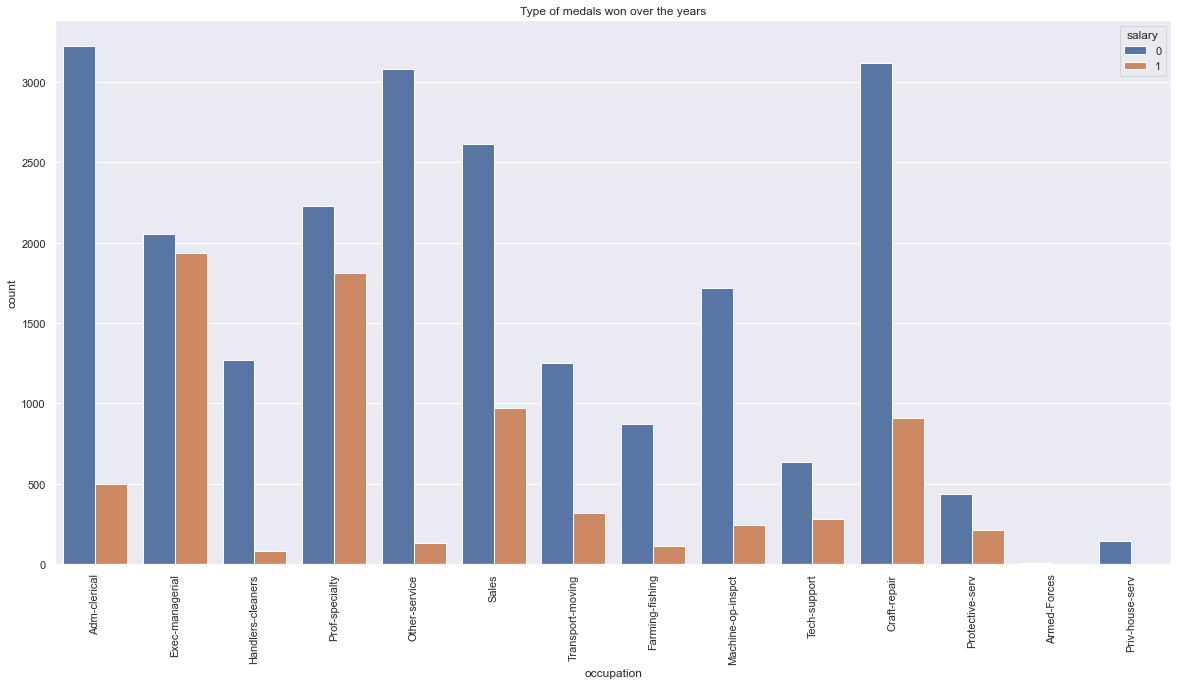

In [35]:
sns.countplot(x='occupation',hue='salary',data=df)
# sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title("Type of medals won over the years")

In [36]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [37]:
def occupationcat(x):
    if x['occupation'] == ' Adm-clerical': 
        return 1
    elif x['occupation'] == 'Exec-managerial':
        return 2
    elif x['occupation'] == 'Handlers-cleaners':
        return 3
    elif x['occupation'] == 'Prof-specialty':
        return 4
    elif x['occupation'] == 'Other-service':
        return 5
    elif x['occupation'] == 'Sales':
        return 6
    elif x['occupation'] == 'Craft-repair':
        return 7
    elif x['occupation'] == 'Transport-moving':
        return 8
    elif x['occupation'] == 'Farming-fishing':
        return 9
    elif x['occupation'] == 'Machine-op-inspct':
        return 10
    elif x['occupation'] == 'Tech-support':
        return 11
    elif x['occupation'] == 'Protective-serv':
        return 12
    elif x['occupation'] == 'Armed-Forces':
        return 13       
    else: 
        return 14
    
df['occupation_type']=df.apply(occupationcat, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass_type,occupation_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,0,0,3,14
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,0,0,2,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,0,0,1,3
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,0,0,1,3
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0,1,4
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,0,0,1,2
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,0,1,5
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,0,1,2,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,0,1,1,4
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,0,1,1,2


In [38]:
df.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass_type,occupation_type
0,39,77516,13,1,3,0,1,2174,0,40,0,0,3,14
1,50,83311,13,0,2,0,1,0,0,13,0,0,2,2
2,38,215646,9,1,3,0,1,0,0,40,0,0,1,3
3,53,234721,7,0,2,3,1,0,0,40,0,0,1,3
4,28,338409,13,0,1,3,0,0,0,40,0,0,1,4
5,37,284582,14,0,1,0,0,0,0,40,0,0,1,2
6,49,160187,5,1,3,3,0,0,0,16,0,0,1,5
7,52,209642,9,0,2,0,1,0,0,45,0,1,2,2
8,31,45781,14,1,3,0,0,14084,0,50,0,1,1,4
9,42,159449,13,0,2,0,1,5178,0,40,0,1,1,2


In [39]:
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  2463,
        3103, 10605,  2964,  3325,  2580,  3471,  4865, 99999,  6514,
        1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,  6767,
        2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,  3818,
         914,   401,  2829,  2977,  4934,  2062,  2354,  3464,  5455,
       15020,  1424,  3273, 22040,  4416, 10566,  4931,  7430, 34095,
        6497,  3908,   114,  2346,  2907,  1151,  9386,  2414,  2290,
        3418, 15831, 41310,  4508,  2538,  3456,  1848,  3887,  7896,
        5721,  9562,  6418,  1455,  2036,  3942,  1831, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086], dtype=int64)

In [40]:
df['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  84661, 257302, 201490], dtype=int64)

In [41]:
item_counts = df["fnlwgt"].value_counts()
item_counts

203488    13
123011    12
113364    12
164190    12
121124    12
          ..
275818     1
318082     1
138342     1
158040     1
201490     1
Name: fnlwgt, Length: 20263, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

X= df.drop(['salary'],axis=1)
y=df['salary']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [43]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (16890, 13)(16890,)
Validation dataset: (4223, 13)(4223,)
Test dataset: (9049, 13)(9049,)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [45]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))

In [46]:
print (models)

[LogisticRegression(), RandomForestClassifier(), MLPClassifier(), GaussianNB(), DecisionTreeClassifier(), SVC()]


In [47]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [48]:
kfold = model_selection.KFold(n_splits=5)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
LR: 0.7918541321335544
----------------------------------------
Random Forest: 0.8524745441629173
----------------------------------------
Neural Network: 0.2507695950745915
----------------------------------------
GaussianNB: 0.7868813639592707
----------------------------------------
DecisionTreeClassifier: 0.808666824532323
----------------------------------------
SVM: 0.7847501775988633


In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [51]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [53]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state = 42)
# from pprint import pprint
# # Look at parameters used by our current forest
# print('Parameters currently in use:\n')
# pprint(rf.get_params())

In [54]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [56]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [60]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

# base_model = RandomForestRegressor(n_estimators = 200, random_state = 42)
base_model = RandomForestClassifier(n_estimators = 600, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1516 degrees.
Accuracy = -inf%.


In [58]:
import pickle

with open('Model.pkl', 'wb') as f:
    pickle.dump(rf_random, f)

In [59]:
with open('Model.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

In [64]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

NameError: name 'y_true' is not defined